# The case
- https://datascienceplus.com/multi-class-text-classification-with-scikit-learn/

In [1]:
import pandas as pd
df0 = pd.read_csv('Consumer_Complaints.csv')
df0.head()

/Users/jirlong/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,06/14/2019,Debt collection,Payday loan debt,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,CURO Intermediate Holdings,CA,90720,NaN,NaN,Web,06/14/2019,Closed with explanation,Yes,NaN,3274703
1,06/14/2019,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,"TIDEWATER FINANCE COMPANY, INC.",SC,29063,NaN,Other,Web,06/14/2019,In progress,Yes,NaN,3274260
2,06/14/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Their investigation did not fix an error on yo...,NaN,NaN,NAVY FEDERAL CREDIT UNION,CA,92571,NaN,NaN,Web,06/14/2019,In progress,Yes,NaN,3275398
3,06/14/2019,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,NaN,"Diversified Consultants, Inc.",TN,380XX,NaN,NaN,Web,06/14/2019,In progress,Yes,NaN,3275356
4,06/14/2019,Debt collection,Other debt,Written notification about debt,Didn't receive enough information to verify debt,NaN,NaN,"Diversified Consultants, Inc.",NY,11434,NaN,NaN,Fax,06/14/2019,In progress,Yes,NaN,3274930


In [2]:
from io import StringIO
df = df0[['Product', 'Consumer complaint narrative']]
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.columns = ['Product', 'Consumer_complaint_narrative']
df['category_id'] = df['Product'].factorize()[0]
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)
df.head()

,Product,Consumer_complaint_narrative,category_id
53679,Debt collection,They failed to properly notify me of student l...,0
53720,Debt collection,"Hi there, My fiance and I rented an apartment ...",0
53760,Debt collection,National Recovery Agency ( NRA ) has improperl...,0
53821,Debt collection,"On XX/XX/XXXX at around XXXX XXXX, I received ...",0
53892,"Credit reporting, credit repair services, or o...",I had asked XXXX XXXX for a quote for rates on...,1


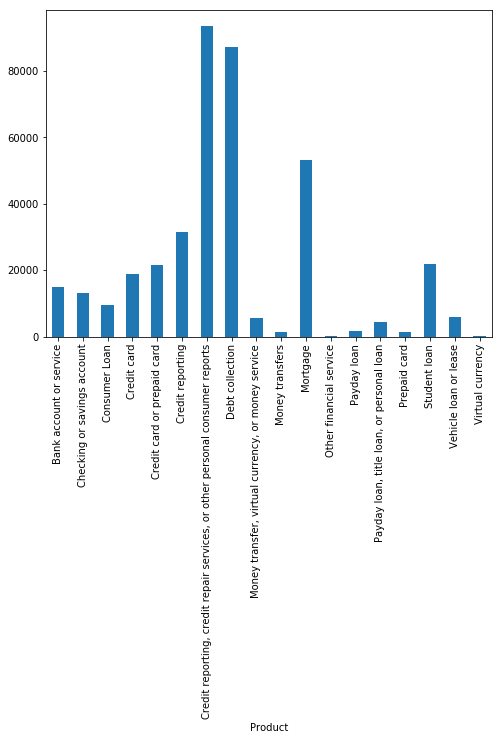

In [3]:
import matplotlib.pyplot as plt
# %matplotlib notebook
%matplotlib inline
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id

In [ ]:
features.shape